In [52]:
%load_ext autoreload
%autoreload 2

from img_pipeline import process_image, get_grads_np, run_simulation
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('bloomberg.jpg')

def print_numpy_img(tensor): # [(x,y)]*time
    plt.imshow(
        tensor,
        cmap='hot',
        interpolation='nearest',
        extent=[0, 1, 1, 0]  # force axes to go from 0 to 1
    )
    plt.colorbar()
    plt.show()

def print_tensor(tensor: np.ndarray, scatter_points: np.ndarray | None = None, ball_sizes: np.ndarray | None = None): # [(x,y)]*time
    plt.imshow(
        tensor,
        cmap='hot',
        interpolation='nearest',
        extent=[0, 1, 1, 0]  # force axes to go from 0 to 1
    )
    plt.colorbar()
    if scatter_points is not None:
        xs = scatter_points[:, 0]
        ys = scatter_points[:, 1]
        s = 2 if ball_sizes is None else ball_sizes
        print(s)
        plt.scatter(xs, ys, c='blue', marker='o', s=s, edgecolors='none')
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


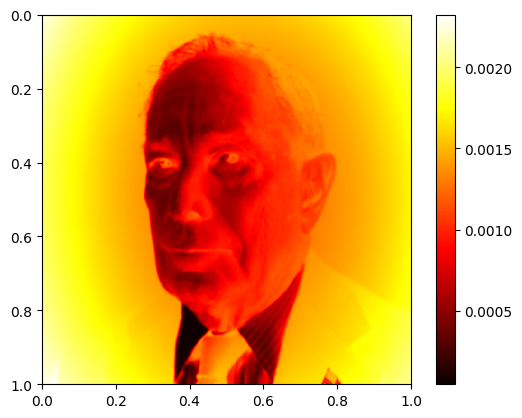

In [53]:
np_img = process_image(img)
print_numpy_img(np_img)

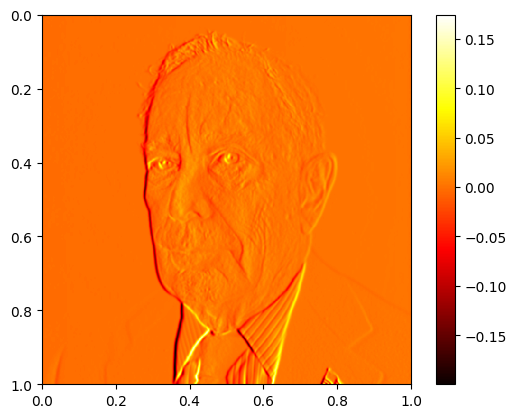

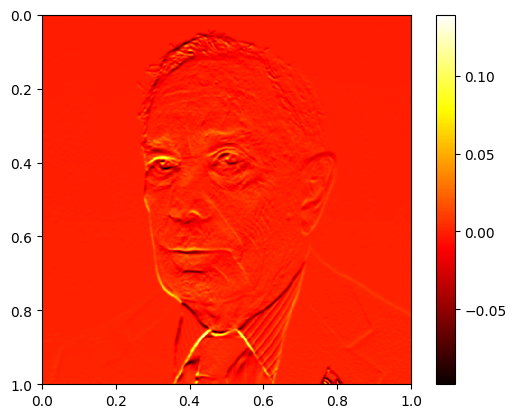

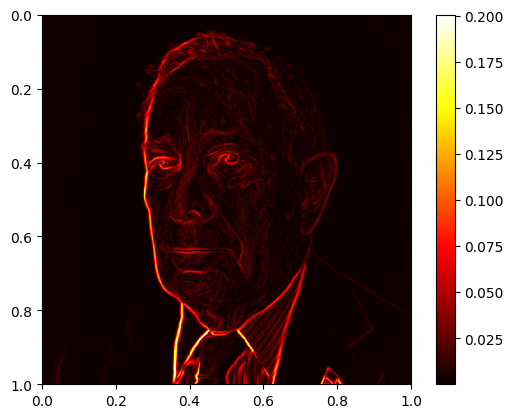

In [54]:
gradient_x, gradient_y = get_grads_np(np_img)
print_numpy_img(gradient_x)
print_numpy_img(gradient_y)
print_numpy_img(np.sqrt(gradient_x ** 2 + gradient_y ** 2))

In [ ]:
start_coords = np.array([0.395, 0.53])
position_over_iterations, velocity_mag_over_time = run_simulation(gradient_x, gradient_y, start_coords, np_img)

In [56]:
print(position_over_iterations)

[[0.395      0.53      ]
 [0.39502    0.53001999]
 [0.39504001 0.53003998]
 ...
 [0.49838513 0.21155383]
 [0.49842129 0.21155121]
 [0.49845746 0.21154859]]


[0.09190015 0.09188596 0.09187177 ... 0.13338088 0.13339585 0.13341082]


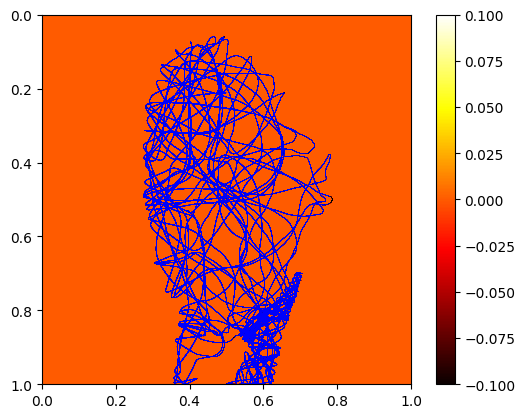

In [57]:
print_tensor(np_img * 0, position_over_iterations, ball_sizes=velocity_mag_over_time)